In [1]:
from pyproj import Proj
import numpy as np 
import matplotlib.pyplot as plt 

In [7]:
# initialize a projection with the projection type, proj
# and the reference ellipse, ellps (ref. ellipse is the ellipse on which lat/lon points are defined)
# WGS84 = World Geodetic System 1984 standard, used for GPS points 
p=Proj(proj='hammer',ellps='WGS84') 
lon=-120.5 
lat=42.4
x,y=p(lon,lat)
print([lon,lat,x,y])

[-120.5, 42.4, -9894366.079201775, 5203184.816359802]


In [2]:
# build latitude/longitude grid 
lon_lines=np.linspace(-180,180,20) # line of longitude at every point 
lat_lines=np.linspace(-90,90,20) # line of latitude at every point 
lat_range=np.linspace(-90,90,181) # lat pts to plot along a lon line 
lon_range=np.linspace(-180,180,361) # lon pts to plot along a lat line 

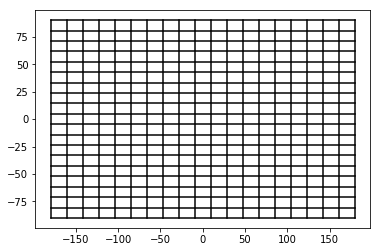

In [3]:
# naively plot the grid in cartesian 
fig=plt.figure()
for lon in lon_lines:
    plt.plot(lon*np.ones(lat_range.size),lat_range,'k')
for lat in lat_lines:
    plt.plot(lon_range,lat*np.ones(lon_range.size),'k')

plt.show()

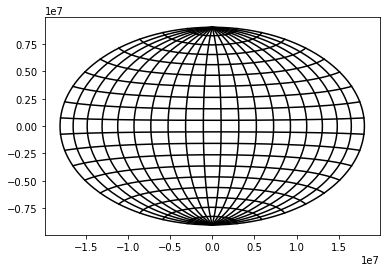

In [4]:
# transform the lat/lon grid to cartesian with projection 
p = Proj(proj='hammer',ellps='WGS84')

for lon in lon_lines:
    x,y= p(lon*np.ones(lat_range.size),lat_range)
    plt.plot(x,y,'k')
for lat in lat_lines:
    x,y= p(lon_range,lat*np.ones(lon_range.size))
    plt.plot(x,y,'k')    
plt.show()

notice the axes above are now in meters! 

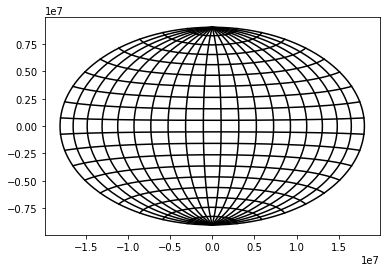

In [5]:
# transform the lat/lon grid to cartesian with projection 
p_dict={'proj':'hammer','ellps':'WGS84'}
p = Proj(p_dict)

for lon in lon_lines:
    x,y= p(lon*np.ones(lat_range.size),lat_range)
    plt.plot(x,y,'k')
for lat in lat_lines:
    x,y= p(lon_range,lat*np.ones(lon_range.size))
    plt.plot(x,y,'k')    
plt.show()

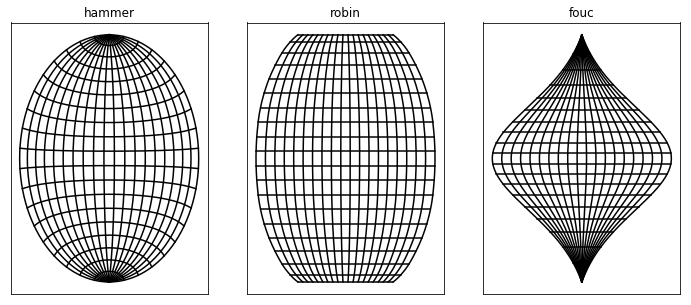

In [6]:
# you can also initialize the Proj class with a dictionary! 
# here, it loops over a number of projection dictionaries and plots each
p_dicts=[{'proj':'hammer','ellps':'WGS84'},
         {'proj':'robin','ellps':'WGS84'},
         {'proj':'fouc','ellps':'WGS84'}]
isubpl=1
plt.figure(figsize=[12,5])
for p_dict in p_dicts: 
    p = Proj(p_dict)
    ax=plt.subplot(1,len(p_dicts),isubpl)
    isubpl=isubpl+1
    for lon in lon_lines:
        x,y= p(lon*np.ones(lat_range.size),lat_range)
        plt.plot(x,y,'k')
    for lat in lat_lines:
        x,y= p(lon_range,lat*np.ones(lon_range.size))
        plt.plot(x,y,'k')
    plt.title(p_dict['proj'])    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()